<h2 id="preprocessing">Capstone Project: Seattle Collisions</h2>
<p> The following lines of code show the methodology behind determining the ideal ML model to predict traffic collisions in the Seattle area. </p>

In [9]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [10]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c7622153ee0b410baef58254573083d7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='IBbmkGFD_6_lMFcUWQ-DKMh0KxNirTE1YWHnYd3GV9Z5',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c7622153ee0b410baef58254573083d7.get_object(Bucket='capstoneprojectcollisions-donotdelete-pr-u19eumerzauobv',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

df = df_data_1
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [11]:
print("Total Rows:", len(df))
df["SEVERITYCODE"].value_counts(dropna=False)

Total Rows: 194673


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [12]:
pd.concat([df.dtypes, df.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
PEDROWNOTGRNT,object,190006
EXCEPTRSNDESC,object,189035
SPEEDING,object,185340
INATTENTIONIND,object,164868
INTKEY,float64,129603
EXCEPTRSNCODE,object,109862
SDOTCOLNUM,float64,79737
JUNCTIONTYPE,object,6329
X,float64,5334
Y,float64,5334


<h3 id="preprocessing">Removing Unnecessary Features</h3>
<p> Our first stage of cleaning the data, is to remove any unnecessary columns and rows from the dataset. </p>

In [13]:
# From reviewing the data, the columns "EXCEPTRSNCODE" and "EXCEPTRSNDESC", 
# highlight any rows of data that don't have sufficient information. 
# As such, these will be removed first. 
print("Total Rows:", len(df))
df["EXCEPTRSNCODE"].value_counts(dropna=False)

Total Rows: 194673


NaN    109862
        79173
NEI      5638
Name: EXCEPTRSNCODE, dtype: int64

In [14]:
df = df[df.EXCEPTRSNCODE != 'NEI']
print("Total Rows:", len(df))
df["EXCEPTRSNCODE"].value_counts(dropna=False)

Total Rows: 189035


NaN    109862
        79173
Name: EXCEPTRSNCODE, dtype: int64

<h3 id="preprocessing">Removing Unnecessary Features</h3>
<p> With the insufficient data rows removed from the dataframe, unnecessary columns will be removed. The columns removed are due to not having any direct influence on the cause of an accident. As that is the purpose of this ML prediction model.</p>

In [15]:
# From reviewing the data, there were a number of columns that had no relevance 
# to the prediction of an accident or were data points from after the accident 
# and so irrelevant in the prediction. As such, they were removed.  
df = df.drop(['EXCEPTRSNCODE', 'EXCEPTRSNDESC', "INTKEY",'INCKEY', 'COLDETKEY', 
              'SEGLANEKEY', 'CROSSWALKKEY',"SEVERITYCODE.1","REPORTNO", "SEVERITYDESC",
              'SDOTCOLNUM','ST_COLDESC', 'LOCATION','STATUS','X','Y','INCDATE','INCDTTM',
              'SDOT_COLCODE','SDOT_COLDESC'], axis=1)

In [16]:
df.head(5)

,SEVERITYCODE,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,1,Intersection,Angles,2,0,0,2,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,2,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,3,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,4,Block,Other,3,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,2,5,Intersection,Angles,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N


In [17]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    189035
Name: SEVERITYCODE, dtype: int64

OBJECTID
False    189035
Name: OBJECTID, dtype: int64

ADDRTYPE
False    189032
True          3
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    184904
True       4131
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    189035
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    189035
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    189035
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    189035
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    185573
True       3462
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
True     159790
False     29245
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    184921
True       4114
Name: UNDERINFL, dtype: int64

WEATHER
False    184737
True       4298
Name: WEATHER, dtype: int64

ROADCOND
False    184805
True       4230
Name: ROADCOND, dtype: int64

LIGHTCOND
False    184667
True       4368
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
True     184409
False      4626
Name

In [18]:
# clean the data of rows with NaN information in important cells. Removes 4500ish data points. 

df = df.dropna(subset=['WEATHER','ROADCOND', 'ROADCOND', 'UNDERINFL','LIGHTCOND','ST_COLCODE','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE'])
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    181066
Name: SEVERITYCODE, dtype: int64

OBJECTID
False    181066
Name: OBJECTID, dtype: int64

ADDRTYPE
False    181066
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    181066
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    181066
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    181066
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    181066
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    181066
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    181066
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
True     152087
False     28979
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    181066
Name: UNDERINFL, dtype: int64

WEATHER
False    181066
Name: WEATHER, dtype: int64

ROADCOND
False    181066
Name: ROADCOND, dtype: int64

LIGHTCOND
False    181066
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
True     176457
False      4609
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
True     171892
False      9174
Name: SPEEDING, dtype: int64

ST_COLCODE

<h2> Converting Categorical to Numerical Data Types </h2>
<p> Given the large number of categorical data points, these need to be converted to numerical types to then be processed into the ML models. This is done through conversion of N and Y values to 0 and 1, as well as one hot encoding various columns in later blocks of code. The data also wants to be checked that there doesn't exist any null values and if it does, then remove these from the data. </p> 

In [19]:
df['UNDERINFL'].unique().tolist()

['N', '0', '1', 'Y']

In [20]:
df['PEDROWNOTGRNT'].unique().tolist()

[nan, 'Y']

In [21]:
df['SPEEDING'].unique().tolist()

[nan, 'Y']

In [22]:
df['INATTENTIONIND'].unique().tolist()

[nan, 'Y']

In [23]:
df['HITPARKEDCAR'].unique().tolist()

['N', 'Y']

In [24]:
df[['PEDROWNOTGRNT','INATTENTIONIND','SPEEDING']] = df[['PEDROWNOTGRNT','INATTENTIONIND','SPEEDING']].fillna('N')

missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

df.head(10)

SEVERITYCODE
False    181066
Name: SEVERITYCODE, dtype: int64

OBJECTID
False    181066
Name: OBJECTID, dtype: int64

ADDRTYPE
False    181066
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    181066
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    181066
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    181066
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    181066
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    181066
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    181066
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
False    181066
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    181066
Name: UNDERINFL, dtype: int64

WEATHER
False    181066
Name: WEATHER, dtype: int64

ROADCOND
False    181066
Name: ROADCOND, dtype: int64

LIGHTCOND
False    181066
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    181066
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    181066
Name: SPEEDING, dtype: int64

ST_COLCODE
False    181066
Name: ST_COLCODE, dtype: int64


,SEVERITYCODE,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,1,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,N,Overcast,Wet,Daylight,N,N,10,N
1,1,2,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),N,0,Raining,Wet,Dark - Street Lights On,N,N,11,N
2,1,3,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),N,0,Overcast,Dry,Daylight,N,N,32,N
3,1,4,Block,Other,3,0,0,3,Mid-Block (not related to intersection),N,N,Clear,Dry,Daylight,N,N,23,N
4,2,5,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,0,Raining,Wet,Daylight,N,N,10,N
5,1,6,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,N,Clear,Dry,Daylight,N,N,10,N
6,1,7,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,0,Raining,Wet,Daylight,N,N,10,N
7,2,9,Intersection,Cycles,3,0,1,1,At Intersection (intersection related),N,N,Clear,Dry,Daylight,N,N,5,N
8,1,10,Block,Parked Car,2,0,0,2,Mid-Block (not related to intersection),N,0,Clear,Dry,Daylight,N,N,32,N
9,2,12,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,0,Clear,Dry,Daylight,N,N,10,N


In [25]:
df['UNDERINFL'].replace(to_replace= ['N', 'Y'], value=[0, 1], inplace = True)
df['UNDERINFL'].replace(to_replace= ['0', '1'], value=[0, 1], inplace = True)
df['PEDROWNOTGRNT'].replace(to_replace= ['N', 'Y'], value=[0, 1], inplace = True)
df['INATTENTIONIND'].replace(to_replace= ['N', 'Y'], value=[0, 1], inplace = True)
df['SPEEDING'].replace(to_replace= ['N', 'Y'], value=[0, 1], inplace = True)
df['HITPARKEDCAR'].replace(to_replace= ['N', 'Y'], value=[0, 1], inplace = True)
df.head()

,SEVERITYCODE,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,1,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,10,0
1,1,2,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,11,0
2,1,3,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,32,0
3,1,4,Block,Other,3,0,0,3,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,23,0
4,2,5,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,10,0


In [26]:
df.isnull().sum()

SEVERITYCODE      0
OBJECTID          0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
HITPARKEDCAR      0
dtype: int64

In [27]:
df.corr()

,SEVERITYCODE,OBJECTID,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
SEVERITYCODE,1.000000,0.037631,0.123792,0.244164,0.213477,-0.079848,0.040400,0.039705,0.206038,0.033914,-0.087120
OBJECTID,0.037631,1.000000,-0.046983,0.031364,0.041562,-0.013972,0.116935,0.004772,-0.008160,-0.031894,0.222185
PERSONCOUNT,0.123792,-0.046983,1.000000,-0.026629,-0.042534,0.399715,0.071111,0.018098,-0.031731,-0.007835,-0.042441
PEDCOUNT,0.244164,0.031364,-0.026629,1.000000,-0.018562,-0.315981,-0.008240,0.014795,0.496801,-0.035003,-0.031187
PEDCYLCOUNT,0.213477,0.041562,-0.042534,-0.018562,1.000000,-0.306282,0.001044,-0.018475,0.325585,-0.022378,-0.027379
VEHCOUNT,-0.079848,-0.013972,0.399715,-0.315981,-0.306282,1.000000,0.051240,-0.011347,-0.277556,-0.048845,0.073987
INATTENTIONIND,0.040400,0.116935,0.071111,-0.008240,0.001044,0.051240,1.000000,-0.030593,-0.030380,-0.054071,0.019401
UNDERINFL,0.039705,0.004772,0.018098,0.014795,-0.018475,-0.011347,-0.030593,1.000000,-0.019470,0.090495,0.022893
PEDROWNOTGRNT,0.206038,-0.008160,-0.031731,0.496801,0.325585,-0.277556,-0.030380,-0.019470,1.000000,-0.030462,-0.027785
SPEEDING,0.033914,-0.031894,-0.007835,-0.035003,-0.022378,-0.048845,-0.054071,0.090495,-0.030462,1.000000,-0.022224


<h2> Visual Aids </h2>
<p> With the data cleaned, various initial graphs are created to get a sense of the impact that each column may have on the severity of the accident. This is to assess if there are any immediate trends, as well as identify if any of the selected columns aren't useful in the ML models. </p>

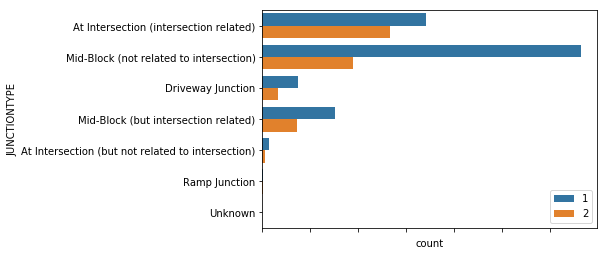

In [28]:
ax = sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

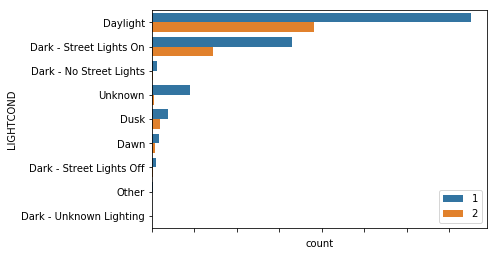

In [29]:
ax = sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

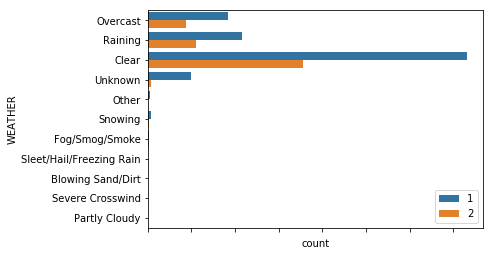

In [30]:
ax = sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

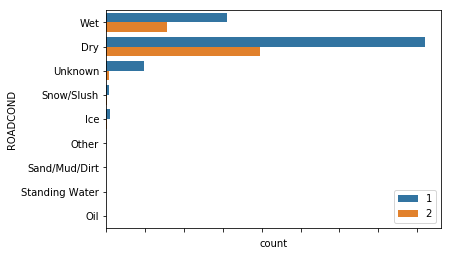

In [31]:
ax = sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

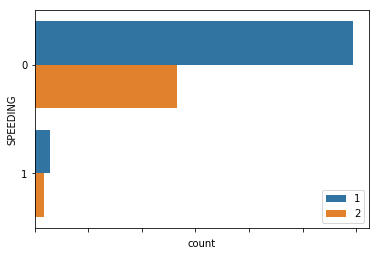

In [32]:
ax = sns.countplot(y="SPEEDING", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

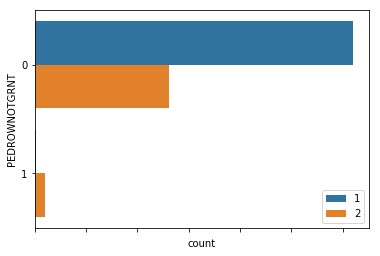

In [33]:
ax = sns.countplot(y="PEDROWNOTGRNT", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

In [36]:
df['JUNCTIONTYPE'].unique().tolist()

['At Intersection (intersection related)',
 'Mid-Block (not related to intersection)',
 'Driveway Junction',
 'Mid-Block (but intersection related)',
 'At Intersection (but not related to intersection)',
 'Ramp Junction',
 'Unknown']

In [37]:
df['ADDRTYPE'].unique().tolist()

['Intersection', 'Block', 'Alley']

In [38]:
df['LIGHTCOND'].unique().tolist()

['Daylight',
 'Dark - Street Lights On',
 'Dark - No Street Lights',
 'Unknown',
 'Dusk',
 'Dawn',
 'Dark - Street Lights Off',
 'Other',
 'Dark - Unknown Lighting']

In [39]:
df['ROADCOND'].unique().tolist()

['Wet',
 'Dry',
 'Unknown',
 'Snow/Slush',
 'Ice',
 'Other',
 'Sand/Mud/Dirt',
 'Standing Water',
 'Oil']

In [40]:
df['COLLISIONTYPE'].unique().tolist()

['Angles',
 'Sideswipe',
 'Parked Car',
 'Other',
 'Cycles',
 'Rear Ended',
 'Head On',
 'Left Turn',
 'Pedestrian',
 'Right Turn']

In [41]:
df['WEATHER'].unique().tolist()

['Overcast',
 'Raining',
 'Clear',
 'Unknown',
 'Other',
 'Snowing',
 'Fog/Smog/Smoke',
 'Sleet/Hail/Freezing Rain',
 'Blowing Sand/Dirt',
 'Severe Crosswind',
 'Partly Cloudy']

In [42]:
Feature = df[['OBJECTID','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING','ST_COLCODE','HITPARKEDCAR']]
Feature = pd.concat([Feature,pd.get_dummies(df[['WEATHER','ADDRTYPE','COLLISIONTYPE','ROADCOND','LIGHTCOND','JUNCTIONTYPE']])], axis=1)
Feature.drop(['LIGHTCOND_Unknown','ROADCOND_Unknown','ROADCOND_Other','WEATHER_Unknown','WEATHER_Other','LIGHTCOND_Other', 'COLLISIONTYPE_Other','JUNCTIONTYPE_Unknown'], axis = 1,inplace=True)
Feature.head()

,OBJECTID,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,...,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction
0,1,2,0,0,2,0,0,0,0,10,...,0,0,1,0,0,1,0,0,0,0
1,2,2,0,0,2,0,0,0,0,11,...,0,0,0,0,0,0,0,0,1,0
2,3,4,0,0,3,0,0,0,0,32,...,0,0,1,0,0,0,0,0,1,0
3,4,3,0,0,3,0,0,0,0,23,...,0,0,1,0,0,0,0,0,1,0
4,5,2,0,0,2,0,0,0,0,10,...,0,0,1,0,0,1,0,0,0,0


<h2> Model Creation </h2>
<p> With the data points all converted we can now begin to build and test various ML models </p>

In [43]:
X = Feature
X[0:5]

,OBJECTID,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,...,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction
0,1,2,0,0,2,0,0,0,0,10,...,0,0,1,0,0,1,0,0,0,0
1,2,2,0,0,2,0,0,0,0,11,...,0,0,0,0,0,0,0,0,1,0
2,3,4,0,0,3,0,0,0,0,32,...,0,0,1,0,0,0,0,0,1,0
3,4,3,0,0,3,0,0,0,0,23,...,0,0,1,0,0,0,0,0,1,0
4,5,2,0,0,2,0,0,0,0,10,...,0,0,1,0,0,1,0,0,0,0


In [44]:
y = df['SEVERITYCODE'].values
y[0:5]
y.shape

(181066,)

In [45]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
X.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


(181066, 52)

In [46]:
# important imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (144852, 52) (144852,)
Test set: (36214, 52) (36214,)


In [48]:
# function to generate confusion matrix
def get_confusion(cm, title):
    plt.figure(figsize=(10,6))
    ax1 = sns.heatmap(cm, annot=True, cmap="Blues", annot_kws = {"size": 14}, fmt='g')
    ax1.set_xlabel('Predicted', fontsize = 14, labelpad=20)
    ax1.set_ylabel('True', fontsize = 14, rotation='horizontal', labelpad=40)
    ax1.set_xticklabels(labels=['Severity 1', 'Severity 2'], fontsize = 14)
    ax1.set_yticklabels(labels=['Severity 1', 'Severity 2'], fontsize = 14)
    ax1.set_title(title, fontsize = 18, pad = 20)
    ax1.collections[0].colorbar.ax.tick_params(labelsize=14)
plt.show()

<h1> Random Forest </h1> 

In [49]:
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(X_train, y_train)
y1_pred_rf = rf1.predict(X_test)

print('Accuracy score of Decision tree model is: ', jaccard_similarity_score(y1_pred_rf, y_test))
print('F1 score of Decision tree model is: ', f1_score(y_true=y_test, y_pred=y1_pred_rf, average='weighted'))

Accuracy score of Decision tree model is:  0.6939581377367868
F1 score of Decision tree model is:  0.6923305438390784


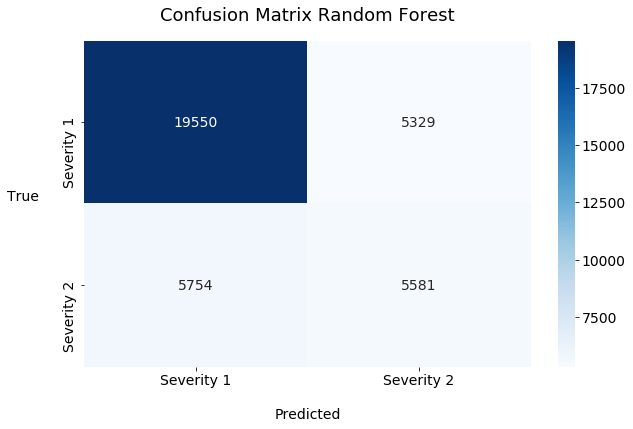

In [50]:
cm1_rf = confusion_matrix(y_test, y1_pred_rf)
get_confusion(cm1_rf, title='Confusion Matrix Random Forest')

<h1> Decision Tree </h1>

In [51]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=None)
tree1.fit(X_train, y_train)
tree_pred = tree1.predict(X_test)

print('Accuracy score of Decision tree model is: ', jaccard_similarity_score(tree_pred, y_test))
print('F1 score of Decision tree model is: ', f1_score(y_true=y_test, y_pred=tree_pred, average='weighted'))

Accuracy score of Decision tree model is:  0.6789915502291931
F1 score of Decision tree model is:  0.6796620200207505


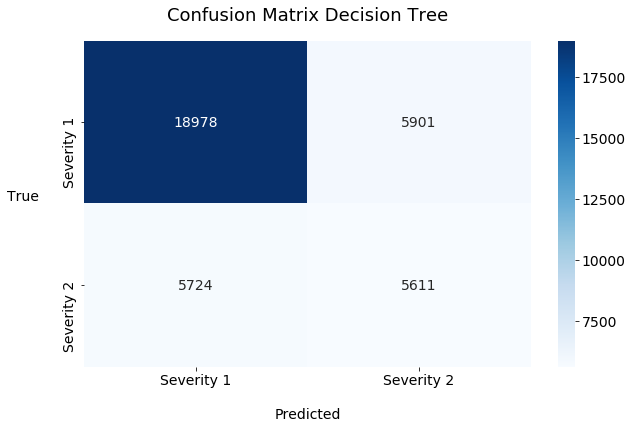

In [52]:
cm2_dt = confusion_matrix(y_test, tree_pred)
get_confusion(cm2_dt, title='Confusion Matrix Decision Tree')

<h1> Logistic Regression </h1>

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

for n in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    loanLR = LogisticRegression(C=0.01, solver=n).fit(X_train,y_train)
    yhat = loanLR.predict(X_test)
    yhat_prob = loanLR.predict_proba(X_test)
    print("For solver type: {}, the log loss is: {}".format(n,log_loss(y_test, yhat_prob)))

For solver type: lbfgs, the log loss is: 0.4940229313482146


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For solver type: saga, the log loss is: 0.4940452772217265
For solver type: liblinear, the log loss is: 0.4940265861030323
For solver type: newton-cg, the log loss is: 0.494023706622321
For solver type: sag, the log loss is: 0.49402716053654205


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [54]:
loanLR = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
yhatLR = loanLR.predict(X_test)
yhatLR_prob = loanLR.predict_proba(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [56]:
print('Jaccard Similarity:', jaccard_similarity_score(y_test, yhatLR))
print('F1 Score:', f1_score(y_test, yhatLR, average='weighted'))
print('Log Loss:', log_loss(y_test, yhatLR_prob))

Jaccard Similarity: 0.7463135803832772
F1 Score: 0.7090822347943164
Log Loss: 0.4940453929421703


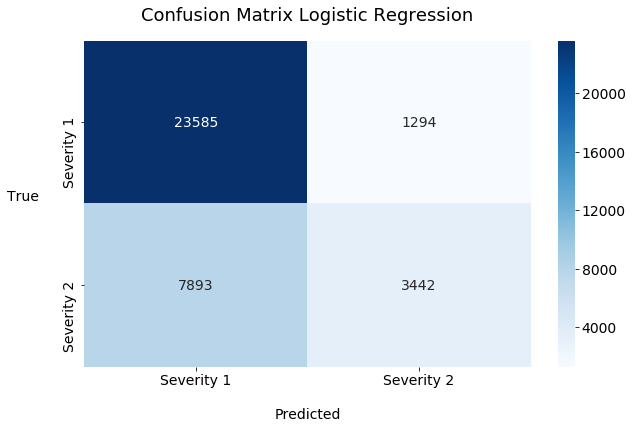

In [57]:
cm3_lr = confusion_matrix(y_test, yhatLR)
get_confusion(cm3_lr, title='Confusion Matrix Logistic Regression')

<h1> Gradient Boost <h1>

In [58]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [59]:
print('Jaccard Similarity:', jaccard_similarity_score(y_test, y_pred_gb))
print('F1 Score:', f1_score(y_test, y_pred_gb, average='weighted'))

Jaccard Similarity: 0.7533826696857568
F1 Score: 0.720768072449609


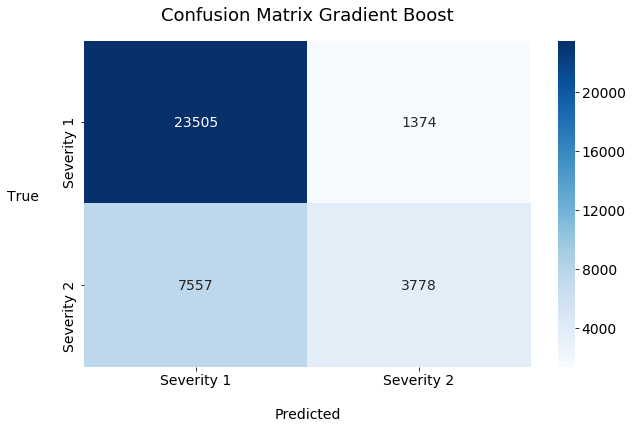

In [60]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
get_confusion(cm_gb, title='Confusion Matrix Gradient Boost')

<h2> Naive Bayes </h2>

In [61]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [62]:
print('Jaccard Similarity:', jaccard_similarity_score(y_test, y_pred_nb))
print('F1 Score:', f1_score(y_test, y_pred_nb, average='weighted'))

Jaccard Similarity: 0.7392721047108853
F1 Score: 0.6910216863593652


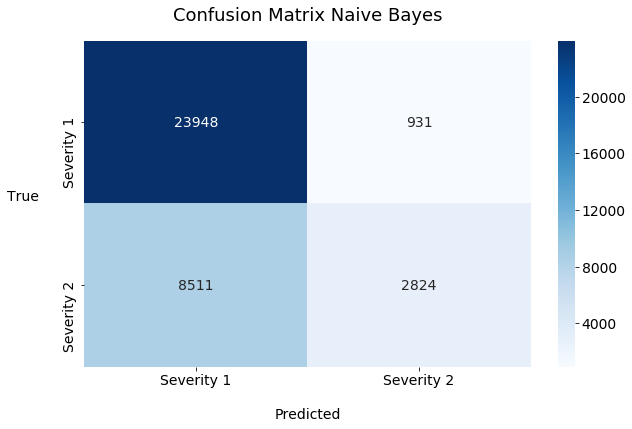

In [63]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
get_confusion(cm_nb, title='Confusion Matrix Naive Bayes')

<h1> Review of Models </h1>

In this project, I built four predictive models to classify collisions severity based on several features, such as weather condition, road condition, number of persons and vehicles etc. All four models produced biased results towards severity 1 when I used all the training dataset. The reason behind this bias was unbalanced data. As such, to resolve the issue, under sampling was undertaken to drop the number of entries of the dominant category (Severity 1) until both categories had that same number of samples.

<h1> Under Sampling </h1>
<p> To assess whether we can have improved accuracy from our models, the data undergoes under sampling and is then re tested for each model </p>

In [64]:
severity_two_len = len(df[df['SEVERITYCODE']==2])
print(severity_two_len)
severity_one_indices = df[df['SEVERITYCODE']==1].index
severity_two_indices = df[df['SEVERITYCODE']==2].index
ran_severity_one_indices = np.random.choice(severity_one_indices, severity_two_len, replace=False)
print(len(ran_severity_one_indices))
final_indices = np.concatenate([ran_severity_one_indices, severity_two_indices])
under_df=df.loc[final_indices]
under_df.shape

56432
56432


(112864, 18)

In [70]:
under_df.dtypes

SEVERITYCODE       int64
OBJECTID           int64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE      object
INATTENTIONIND     int64
UNDERINFL          int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT      int64
SPEEDING           int64
ST_COLCODE        object
HITPARKEDCAR       int64
dtype: object

In [73]:
Feature = under_df[['OBJECTID','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING','ST_COLCODE','HITPARKEDCAR']]
Feature = pd.concat([Feature,pd.get_dummies(under_df[['WEATHER','ADDRTYPE','COLLISIONTYPE','ROADCOND','LIGHTCOND','JUNCTIONTYPE']])], axis=1)
Feature.drop(['LIGHTCOND_Unknown','ROADCOND_Unknown','ROADCOND_Other','WEATHER_Unknown','WEATHER_Other','LIGHTCOND_Other', 'COLLISIONTYPE_Other','JUNCTIONTYPE_Unknown'], axis = 1,inplace=True)
Feature.head()

,OBJECTID,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,...,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction
149254,165909,2,0,0,2,0,0,0,0,32,...,0,0,1,0,0,0,0,0,1,0
110003,121452,2,0,0,2,0,0,0,0,10,...,0,0,1,0,0,0,1,0,0,0
35523,40598,2,0,0,2,0,0,0,0,32,...,0,0,0,0,0,0,0,0,1,0
12554,15888,2,0,0,2,0,0,0,0,13,...,0,0,1,0,0,0,0,1,0,0
10024,12610,2,0,0,2,0,0,0,1,10,...,0,0,1,0,0,1,0,0,0,0


<h1> Re Modelling </h1>

In [74]:
X = Feature
X[0:5]

,OBJECTID,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,...,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction
149254,165909,2,0,0,2,0,0,0,0,32,...,0,0,1,0,0,0,0,0,1,0
110003,121452,2,0,0,2,0,0,0,0,10,...,0,0,1,0,0,0,1,0,0,0
35523,40598,2,0,0,2,0,0,0,0,32,...,0,0,0,0,0,0,0,0,1,0
12554,15888,2,0,0,2,0,0,0,0,13,...,0,0,1,0,0,0,0,1,0,0
10024,12610,2,0,0,2,0,0,0,1,10,...,0,0,1,0,0,1,0,0,0,0


In [76]:
y = under_df['SEVERITYCODE'].values
y[0:5]
y.shape

(112864,)

In [77]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
X.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


(112864, 52)

In [78]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90291, 52) (90291,)
Test set: (22573, 52) (22573,)


<h1> Random Tree </h1>

In [79]:
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(X_train, y_train)
y1_pred_rf = rf1.predict(X_test)

print('Accuracy score of Decision tree model is: ', jaccard_similarity_score(y1_pred_rf, y_test))
print('F1 score of Decision tree model is: ', f1_score(y_true=y_test, y_pred=y1_pred_rf, average='weighted'))

Accuracy score of Decision tree model is:  0.6570238780844372
F1 score of Decision tree model is:  0.6570214871438689


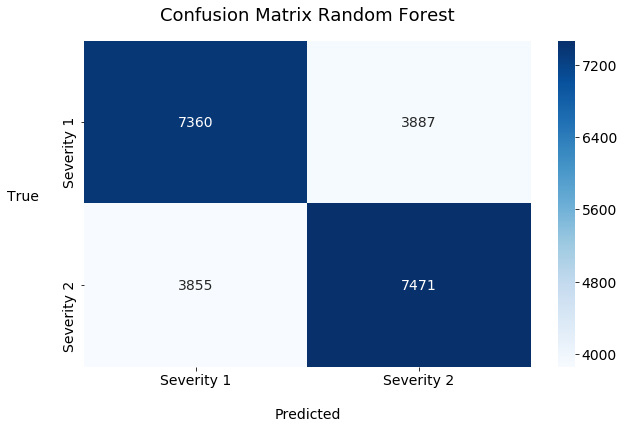

In [80]:
cm1_rf = confusion_matrix(y_test, y1_pred_rf)
get_confusion(cm1_rf, title='Confusion Matrix Random Forest')

<h1> Decision Tree </h1>

In [81]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=None)
tree1.fit(X_train, y_train)
tree_pred = tree1.predict(X_test)

print('Accuracy score of Decision tree model is: ', jaccard_similarity_score(tree_pred, y_test))
print('F1 score of Decision tree model is: ', f1_score(y_true=y_test, y_pred=tree_pred, average='weighted'))

Accuracy score of Decision tree model is:  0.6408984184645373
F1 score of Decision tree model is:  0.6408981844823964


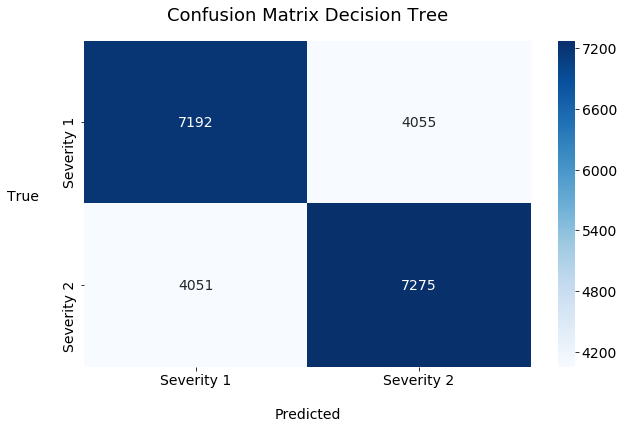

In [82]:
cm2_dt = confusion_matrix(y_test, tree_pred)
get_confusion(cm2_dt, title='Confusion Matrix Decision Tree')

<h1> Logistic Regression </h1>

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

for n in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    loanLR = LogisticRegression(C=0.01, solver=n).fit(X_train,y_train)
    yhat = loanLR.predict(X_test)
    yhat_prob = loanLR.predict_proba(X_test)
    print("For solver type: {}, the log loss is: {}".format(n,log_loss(y_test, yhat_prob)))

For solver type: lbfgs, the log loss is: 0.5451021096616983


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For solver type: saga, the log loss is: 0.5451148588514273
For solver type: liblinear, the log loss is: 0.5451025863468549
For solver type: newton-cg, the log loss is: 0.5451023248750592
For solver type: sag, the log loss is: 0.5451043345248437


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [84]:
loanLR = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
yhatLR = loanLR.predict(X_test)
yhatLR_prob = loanLR.predict_proba(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [85]:
print('Jaccard Similarity:', jaccard_similarity_score(y_test, yhatLR))
print('F1 Score:', f1_score(y_test, yhatLR, average='weighted'))
print('Log Loss:', log_loss(y_test, yhatLR_prob))

Jaccard Similarity: 0.7010144863332299
F1 Score: 0.6980395343467898
Log Loss: 0.54511493509724


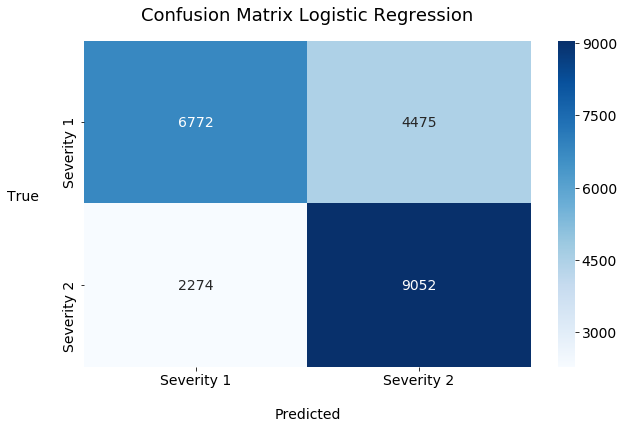

In [86]:
cm3_lr = confusion_matrix(y_test, yhatLR)
get_confusion(cm3_lr, title='Confusion Matrix Logistic Regression')

<h1> Gradient Boost </h1>

In [87]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [88]:
print('Jaccard Similarity:', jaccard_similarity_score(y_test, y_pred_gb))
print('F1 Score:', f1_score(y_test, y_pred_gb, average='weighted'))

Jaccard Similarity: 0.7161210295485757
F1 Score: 0.71387165499706


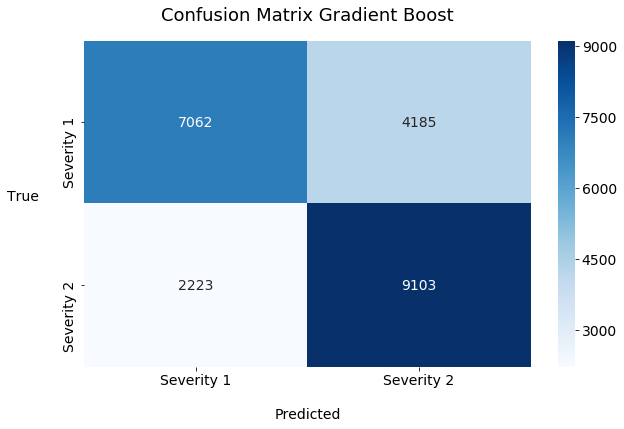

In [89]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
get_confusion(cm_gb, title='Confusion Matrix Gradient Boost')

<h1> Naive Bayes </h1>

In [90]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [91]:
print('Jaccard Similarity:', jaccard_similarity_score(y_test, y_pred_nb))
print('F1 Score:', f1_score(y_test, y_pred_nb, average='weighted'))

Jaccard Similarity: 0.6323483808089311
F1 Score: 0.6055007477001966


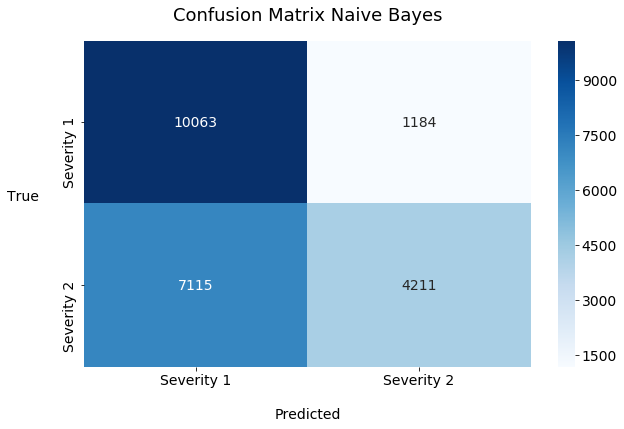

In [92]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
get_confusion(cm_nb, title='Confusion Matrix Naive Bayes')

<h1> Conclusion </h1>

After applying the under-sampling, the models performed better in making unbiased classification except for the Naïve Bayles model. While there were reductions across each model in Jaccard Similarity and F1 scores, as seen in Table 2, their performance in classifying Severity 2 increased dramatically, as seen in Figure 9. 

It has been observed that the ideal model to predict the Severity of the accident is the Gradient Boost model, with a Jaccard Similarity Score of 0.716 and F1 Score of 0.714.

While the under sampling proved effective, it should be noted that a deeper consideration towards the connection between accidents in Seattle areas and any relevant supporting projects from the council may be show interesting connections to reduce the severity of accidents. 